In [2]:
import numpy as np
import mne # docu: https://mne.tools/stable/overview/index.html
import pandas as pd
import matplotlib.pyplot as plt
import glob
import mne_connectivity as mne_connect
from autoreject import get_rejection_threshold

# https://neuraldatascience.io/7-eeg/mne_data.html
%matplotlib widget

In [3]:
raw = mne.io.read_raw_eximia("data_ukazka/sub-S01/sub-S01.nxe", preload=False, verbose=None)

Loading sub-S01.nxe


In [4]:
print(raw)

<RawEximia | sub-S01.nxe, 64 x 1482442 (1022.4 s), ~64 kB, data not loaded>


In [5]:
raw.info

<Info | 7 non-empty values
 bads: []
 ch_names: GateIn, Trig1, Trig2, EOG, Fp1, Fpz, Fp2, AF1, AFz, AF2, F7, F3, ...
 chs: 3 Stimulus, 1 EOG, 60 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 725.0 Hz
 meas_date: unspecified
 nchan: 64
 projs: []
 sfreq: 1450.0 Hz
>

In [6]:
raw.info.keys()

dict_keys(['acq_pars', 'acq_stim', 'ctf_head_t', 'description', 'dev_ctf_t', 'dig', 'experimenter', 'utc_offset', 'device_info', 'file_id', 'highpass', 'hpi_subsystem', 'kit_system_id', 'helium_info', 'line_freq', 'lowpass', 'meas_date', 'meas_id', 'proj_id', 'proj_name', 'subject_info', 'xplotter_layout', 'gantry_angle', 'bads', 'chs', 'comps', 'events', 'hpi_meas', 'hpi_results', 'projs', 'proc_history', 'custom_ref_applied', 'sfreq', 'dev_head_t', 'ch_names', 'nchan'])

In [7]:
print(raw.info['ch_names'])

['GateIn', 'Trig1', 'Trig2', 'EOG', 'Fp1', 'Fpz', 'Fp2', 'AF1', 'AFz', 'AF2', 'F7', 'F3', 'F1', 'Fz', 'F2', 'F4', 'F8', 'FT9', 'FT7', 'FC5', 'FC3', 'FC1', 'FCz', 'FC2', 'FC4', 'FC6', 'FT8', 'FT10', 'T7', 'C5', 'C3', 'C1', 'Cz', 'C2', 'C4', 'C6', 'T8', 'TP9', 'TP7', 'CP5', 'CP3', 'CP1', 'CPz', 'CP2', 'CP4', 'CP6', 'TP8', 'TP10', 'P9', 'P7', 'P3', 'P1', 'Pz', 'P2', 'P4', 'P8', 'P10', 'PO3', 'POz', 'PO4', 'O1', 'Oz', 'O2', 'Iz']


In [8]:
raw.__dict__

{'preload': False,
 '_last_samps': array([1482441]),
 '_first_samps': array([0]),
 'info': <Info | 7 non-empty values
  bads: []
  ch_names: GateIn, Trig1, Trig2, EOG, Fp1, Fpz, Fp2, AF1, AFz, AF2, F7, F3, ...
  chs: 3 Stimulus, 1 EOG, 60 EEG
  custom_ref_applied: False
  highpass: 0.0 Hz
  lowpass: 725.0 Hz
  meas_date: unspecified
  nchan: 64
  projs: []
  sfreq: 1450.0 Hz
 >,
 'buffer_size_sec': 1.0,
 '_cals': array([0.0015259 , 0.0015259 , 0.0015259 , 0.38147555, 0.07629511,
        0.07629511, 0.07629511, 0.07629511, 0.07629511, 0.07629511,
        0.07629511, 0.07629511, 0.07629511, 0.07629511, 0.07629511,
        0.07629511, 0.07629511, 0.07629511, 0.07629511, 0.07629511,
        0.07629511, 0.07629511, 0.07629511, 0.07629511, 0.07629511,
        0.07629511, 0.07629511, 0.07629511, 0.07629511, 0.07629511,
        0.07629511, 0.07629511, 0.07629511, 0.07629511, 0.07629511,
        0.07629511, 0.07629511, 0.07629511, 0.07629511, 0.07629511,
        0.07629511, 0.07629511, 0.076295

In [9]:
raw_data = raw.get_data()
print(raw_data.shape)
print(type(raw_data))

(64, 1482442)
<class 'numpy.ndarray'>


Using matplotlib as 2D backend.


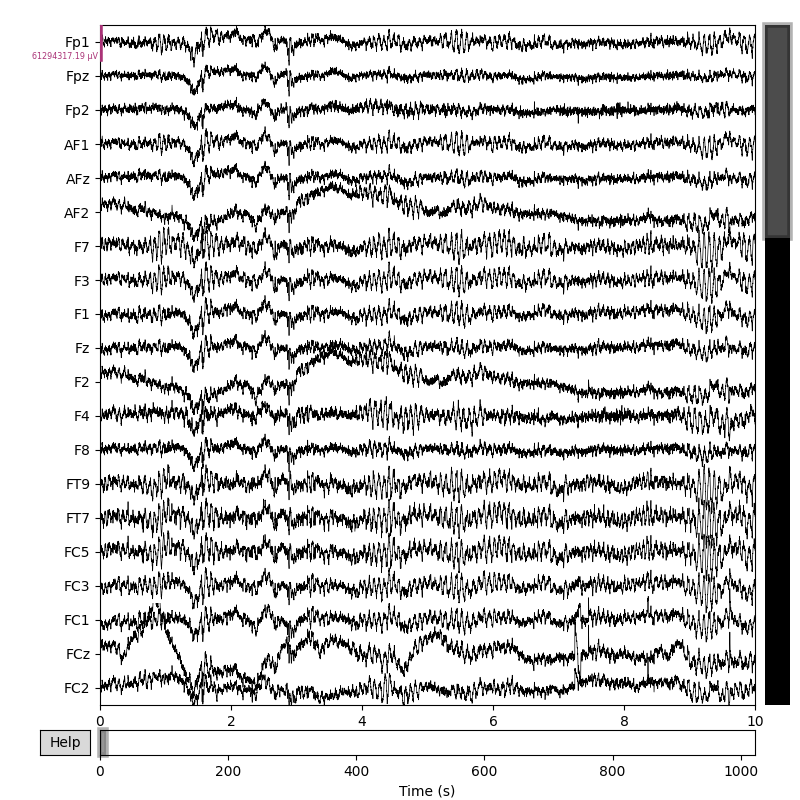

In [10]:
raw.plot(scalings='auto');  # scalings='auto' je nutné, jinak to nefunguje!

In [11]:
raw.to_data_frame()

,time,GateIn,Trig1,Trig2,EOG,Fp1,Fpz,Fp2,AF1,AFz,...,P4,P8,P10,PO3,POz,PO4,O1,Oz,O2,Iz
0,0.000000,0.015259,0.013733,0.016785,-4.001678e+08,-7.415885e+07,-1.017777e+08,-1.026169e+08,-1.140612e+08,-7.537957e+07,...,-1.055161e+08,-1.202411e+08,-1.186389e+08,-7.476921e+07,-7.438773e+07,-1.122301e+08,-9.018082e+07,-1.272602e+08,-1.104753e+08,-8.537423e+07
1,0.000690,0.013733,0.012207,0.015259,-4.005493e+08,-7.377737e+07,-1.017014e+08,-1.032273e+08,-1.127642e+08,-7.515068e+07,...,-1.049058e+08,-1.168841e+08,-1.184863e+08,-7.362478e+07,-7.255665e+07,-1.111620e+08,-8.804456e+07,-1.261921e+08,-1.090257e+08,-8.331426e+07
2,0.001379,0.015259,0.018311,0.015259,-3.974975e+08,-7.461662e+07,-1.012436e+08,-1.049821e+08,-1.132219e+08,-7.469291e+07,...,-1.043717e+08,-1.168078e+08,-1.169604e+08,-7.370108e+07,-7.248035e+07,-1.107805e+08,-8.850233e+07,-1.258106e+08,-1.086442e+08,-8.262760e+07
3,0.002069,0.013733,0.018311,0.013733,-3.978790e+08,-7.606622e+07,-1.010910e+08,-1.071183e+08,-1.166552e+08,-7.804990e+07,...,-1.049821e+08,-1.180285e+08,-1.165026e+08,-7.415885e+07,-7.377737e+07,-1.106279e+08,-8.888380e+07,-1.261158e+08,-1.071183e+08,-8.369574e+07
4,0.002759,0.016785,0.013733,0.019837,-3.994049e+08,-7.675288e+07,-1.017014e+08,-1.077287e+08,-1.161975e+08,-7.835508e+07,...,-1.045243e+08,-1.175708e+08,-1.139849e+08,-7.431144e+07,-7.240406e+07,-1.091020e+08,-8.751049e+07,-1.257343e+08,-1.059739e+08,-8.285649e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1482437,1022.370345,0.013733,0.010681,0.012207,-4.173342e+08,-8.514534e+07,-9.750515e+07,-1.057450e+08,-1.144427e+08,-8.583200e+07,...,-7.171740e+07,-8.407721e+07,-7.324331e+07,-6.439307e+07,-4.966812e+07,-8.484016e+07,-7.156481e+07,-9.994659e+07,-6.866560e+07,-4.982071e+07
1482438,1022.371034,0.015259,0.016785,0.013733,-4.165713e+08,-8.430610e+07,-9.605554e+07,-1.049058e+08,-1.136034e+08,-8.468757e+07,...,-6.942855e+07,-8.232242e+07,-6.965743e+07,-6.286717e+07,-4.837110e+07,-8.285649e+07,-7.042039e+07,-9.857328e+07,-6.752117e+07,-4.760815e+07
1482439,1022.371724,0.015259,0.015259,0.015259,-4.154269e+08,-8.422980e+07,-9.605554e+07,-1.043717e+08,-1.127642e+08,-8.484016e+07,...,-6.919966e+07,-8.148318e+07,-6.889448e+07,-6.370642e+07,-4.806592e+07,-8.171206e+07,-6.897078e+07,-9.727626e+07,-6.637675e+07,-4.760815e+07
1482440,1022.372414,0.016785,0.012207,0.016785,-4.150454e+08,-8.354314e+07,-9.590295e+07,-1.054398e+08,-1.130694e+08,-8.491646e+07,...,-6.912337e+07,-8.094911e+07,-6.668193e+07,-6.385901e+07,-4.791333e+07,-8.102541e+07,-6.935225e+07,-9.895476e+07,-6.485084e+07,-4.783703e+07


In [12]:
raw.set_montage('standard_1005')

<RawEximia | sub-S01.nxe, 64 x 1482442 (1022.4 s), ~89 kB, data not loaded>

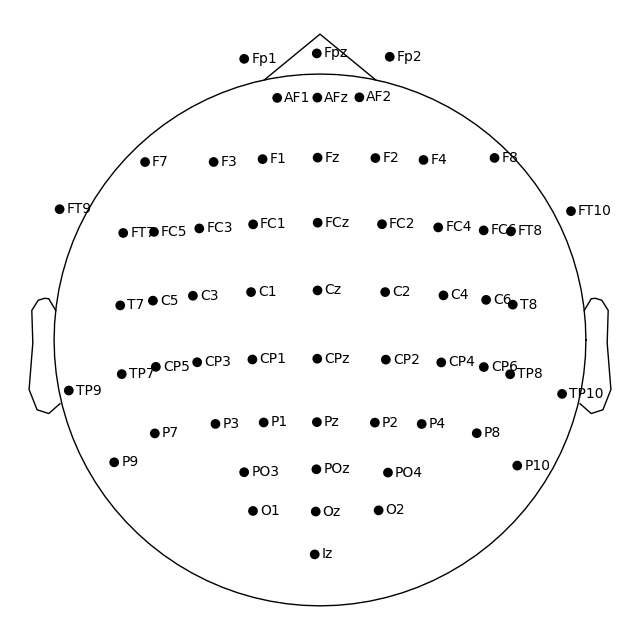

In [13]:
raw.plot_sensors(show_names=True);

NOTE: pick_types() is a legacy function. New code should use inst.pick(...).


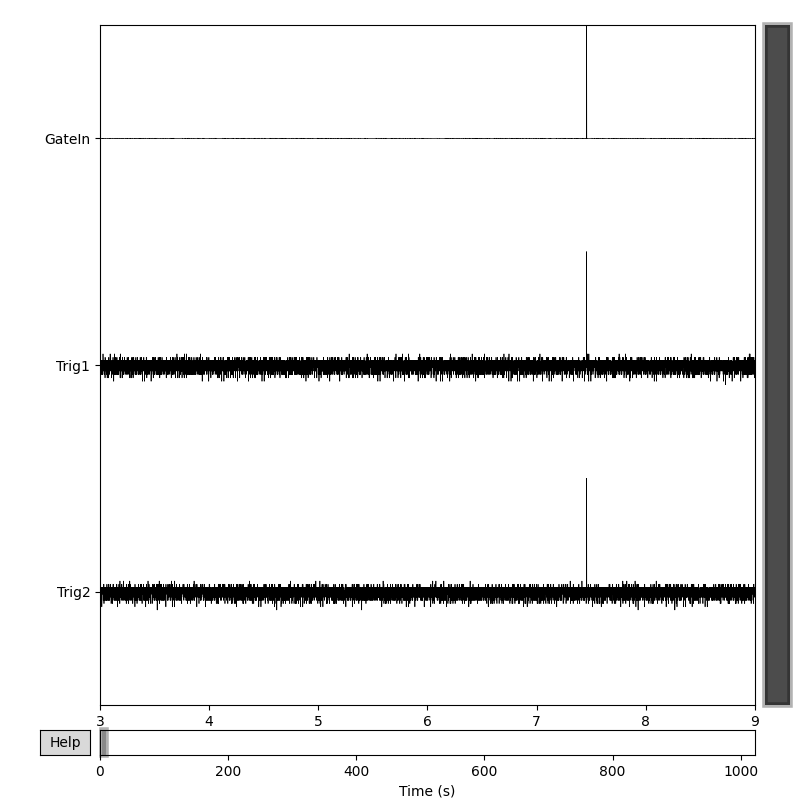

In [14]:
raw.copy().pick_types(meg=False, stim=True).plot(start=3, duration=6);

In [15]:
events = mne.find_events(raw, stim_channel=["GateIn","Trig1","Trig2"],min_duration = 2 / raw.info['sfreq'])
# je jedno, jestli je tu ["GateIn","Trig1","Trig2"], nebo jen "GateIn", nebo nic
# min_duration = 2 / raw.info['sfreq'] je pořeba, protože tam někde asi je nějaký fakt krátký event
events
# plot: fig = mne.viz.plot_events(events, sfreq=raw.info["sfreq"], first_samp=raw.first_samp)

267 events found
Event IDs: [4]


array([[  10812,       0,       4],
       [  13939,       0,       4],
       [  17128,       0,       4],
       [  20442,       0,       4],
       [  23592,       0,       4],
       [  26877,       0,       4],
       [  30205,       0,       4],
       [  33150,       0,       4],
       [  36129,       0,       4],
       [  39262,       0,       4],
       [  42383,       0,       4],
       [  45687,       0,       4],
       [  48796,       0,       4],
       [  52108,       0,       4],
       [  55222,       0,       4],
       [  58126,       0,       4],
       [  61221,       0,       4],
       [ 174209,       0,       4],
       [ 177159,       0,       4],
       [ 180206,       0,       4],
       [ 183284,       0,       4],
       [ 186300,       0,       4],
       [ 189461,       0,       4],
       [ 192823,       0,       4],
       [ 196040,       0,       4],
       [ 199026,       0,       4],
       [ 202365,       0,       4],
       [ 205586,       0,   

In [16]:
mapping = {
    4: "trigger",
}
annot_from_events = mne.annotations_from_events(
    events=events,
    event_desc=mapping,
    sfreq=raw.info["sfreq"],
    orig_time=raw.info["meas_date"],
)
raw.set_annotations(annot_from_events)
raw.annotations

<Annotations | 267 segments: trigger (267)>

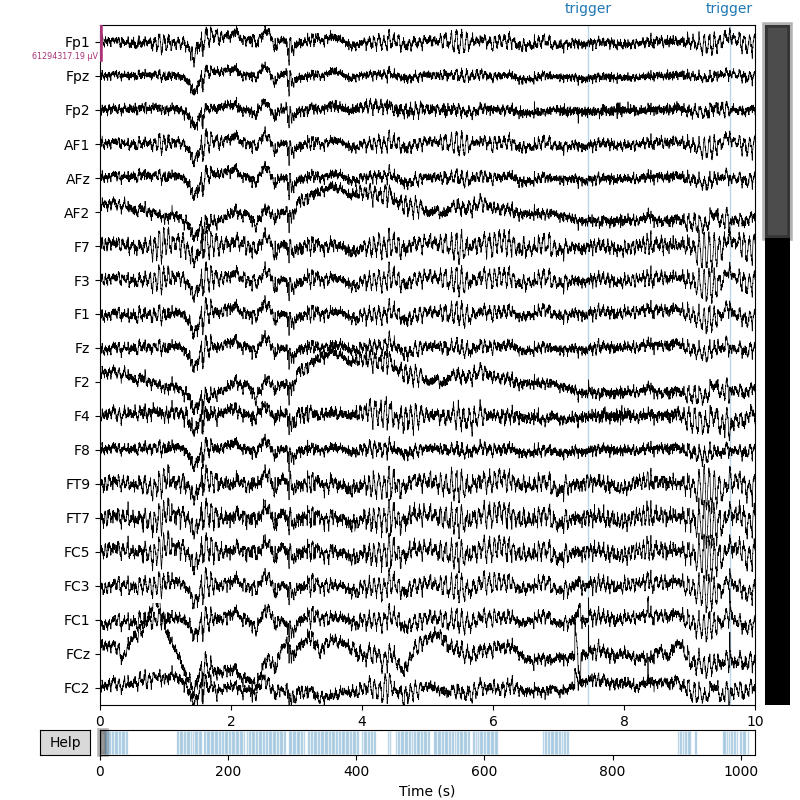

In [17]:
raw.plot(scalings='auto'); # bylo by hezké, kdyby events byly červené, ale event_color='red' nefunguje a nechci s tím trávit víc času

Effective window size : 1.412 (s)


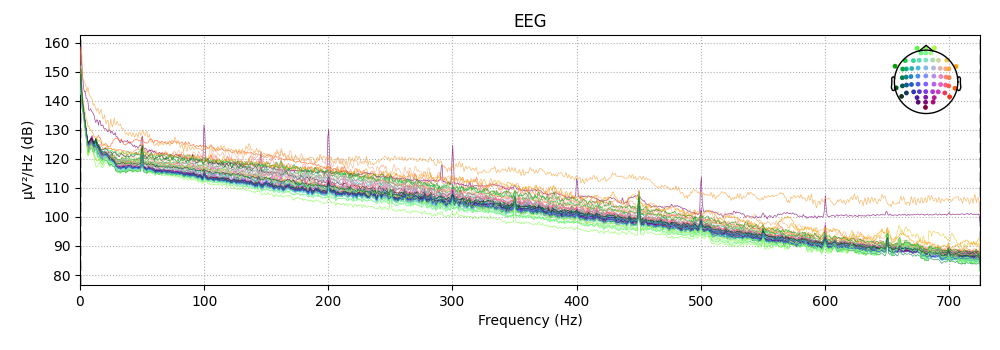

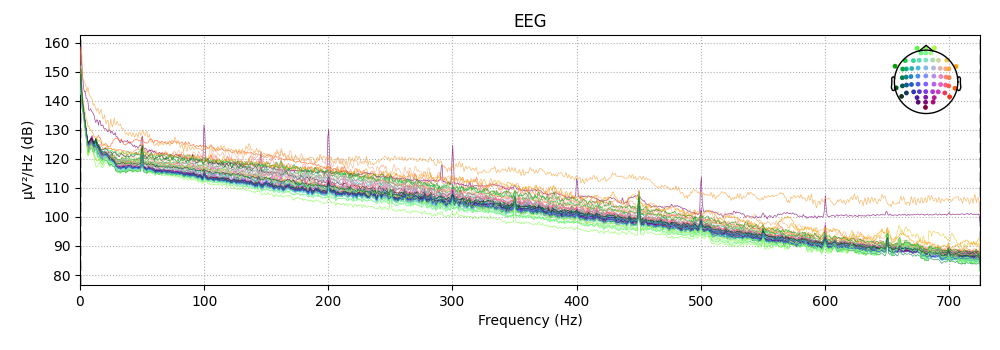

In [18]:
raw.compute_psd().plot(); 
# TODO zeptat se: https://neuraldatascience.io/7-eeg/erp_filtering.html píšou o 30 Hz low-pass, ale tady to není naznačené
# v návodu taky mají maximální frekvenci o dost menší a nejsou tam peeky na stovkách, co to je?

Reading 0 ... 1482441  =      0.000 ...  1022.373 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 47851 samples (33.001 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    2.2s


Effective window size : 1.412 (s)


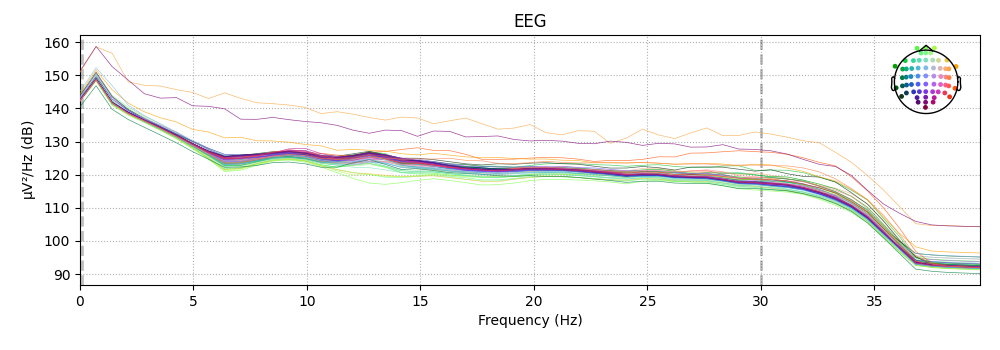

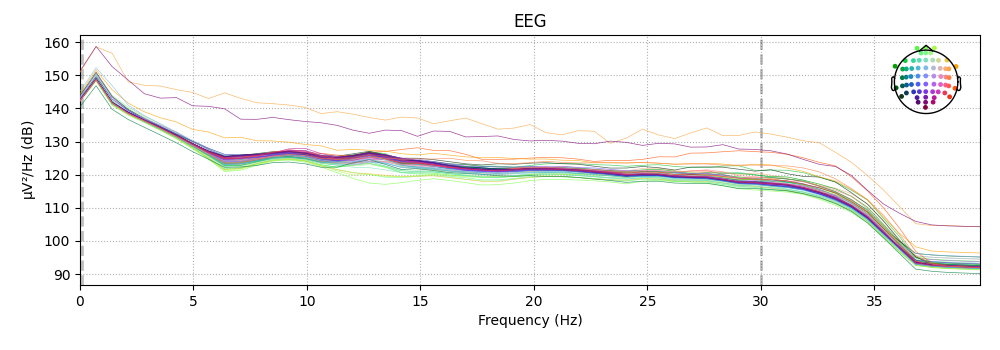

In [19]:
# Filter settings
low_cut = 0.1
hi_cut  = 30

raw.load_data()
raw_filtered = raw.copy().filter(low_cut, hi_cut)
raw_filtered.compute_psd(fmax=40).plot();

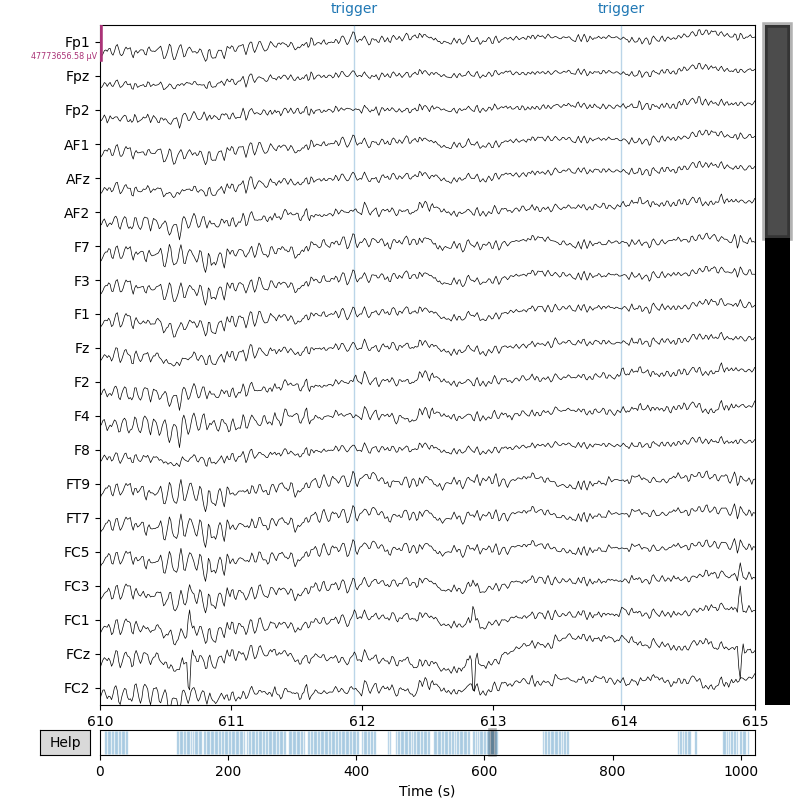

In [20]:
raw_filtered.plot(start=610, duration=5, scalings='auto');

Závěr: Obrázek výše snad ok, takže se povedlo filtrovní pomocí band-pass filtru. Když se pokouším dál pokračovat v návodu, tak mi to padá na nedostatek paměti, zkouším tedy přesunout další kroky do separátního notebooku `preprocessing.ipynb` (což trochu pomohlo).